Task a

In [1]:
import pandas as pd

data = pd.read_csv("volume_pressure_data.csv")

print(f"The first 10 rows of data are: \n {data.head(10)}\n")

df_volume = data['Volume']
df_pressure = data['Pressure']

mean_V = df_volume.mean()
mean_P = df_pressure.mean()

print(f"The mean volume is {mean_V}, while the mean pressure is {mean_P}\n")

median_V = df_volume.median()
median_P = df_pressure.median()

print(f"The median volume is {median_V}, while the median pressure is {median_P}\n")

std_dev_V = df_volume.std()
std_dev_P = df_pressure.std()

print(f"The standard deviation of volume is {std_dev_V}, while the standard deviation of pressure is {std_dev_P}\n")


The first 10 rows of data are: 
    Volume  Pressure
0      48   29.1250
1      46   30.5625
2      44   31.9375
3      42   33.5000
4      40   35.3125
5      38   37.0000
6      36   39.3125
7      34   41.6250
8      32   44.1875
9      30   47.0625

The mean volume is 27.12, while the mean pressure is 61.5075

The median volume is 24.0, while the median pressure is 58.8125

The standard deviation of volume is 11.192705958197358, while the standard deviation of pressure is 25.84054620407626



Task b

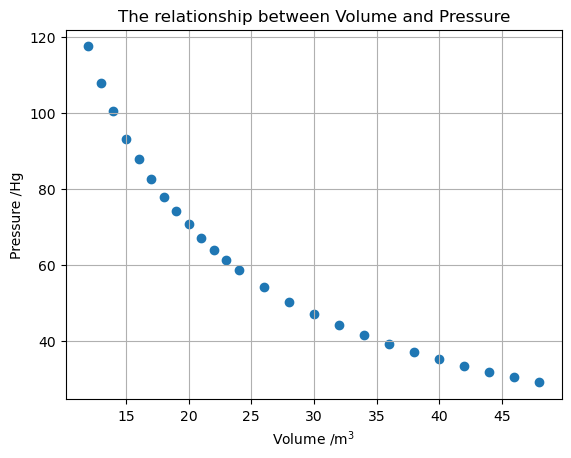

In [2]:
import matplotlib.pyplot as plt

volume = data['Volume']
pressure = data['Pressure']

plt.scatter(volume, pressure)
plt.xlabel(r'Volume /m$^3$')
plt.ylabel(r'Pressure /Hg')
plt.title('The relationship between Volume and Pressure')
plt.grid(True)
plt.show()

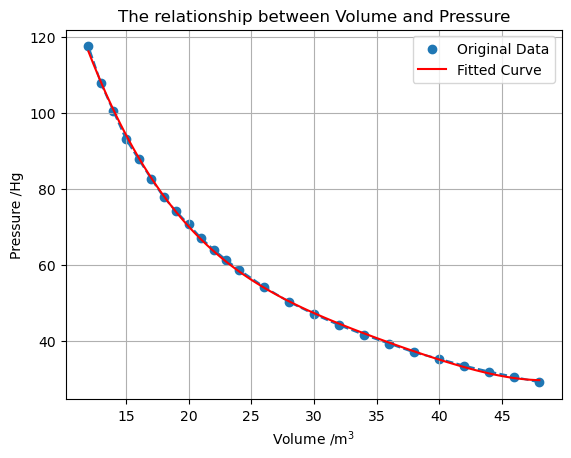

In [3]:
import matplotlib.pyplot as plt
import numpy as np

volume = data['Volume']
pressure = data['Pressure']

plt.scatter(volume, pressure, label='Original Data')
plt.plot(volume, pressure, linestyle='--')

coefficients = np.polyfit(volume, pressure, 4)

x_fit = np.linspace(volume.min(), volume.max(), 100)
y_fit = np.polyval(coefficients, x_fit)

plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')

plt.xlabel(r'Volume /m$^3$')
plt.ylabel(r'Pressure /Hg')
plt.title('The relationship between Volume and Pressure')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
print(f"The fitting equation is: P = {coefficients[0]:.4f}V^3 + {coefficients[1]:.4f}V^2 + {coefficients[2]:.4f}V + {coefficients[3]:.4f}")


The fitting equation is: P = 0.0001V^3 + -0.0170V^2 + 0.9387V + -24.4875


In [5]:
polynomial_fit_fuc = np.poly1d(coefficients)
y_predicted = polynomial_fit_fuc(volume)

rmse = np.sqrt(np.mean((y_predicted - pressure) ** 2))
print(rmse)

0.5038681744245075


Although the data is fitted well by the above 4-degree polynomial equation, this P-V relationshio, which shows P is proportional to V, is not physically correctly.

[1.40309914e+03 1.94616539e-01]


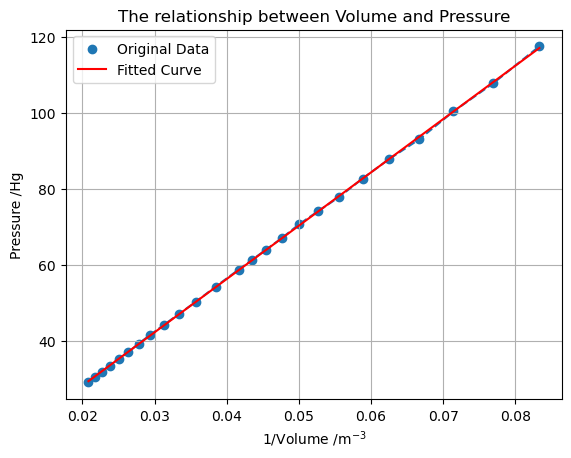

In [6]:
import matplotlib.pyplot as plt
import numpy as np

volume = data['Volume']
pressure = data['Pressure']

inverse_V = 1/volume

plt.scatter(inverse_V, pressure, label='Original Data')
plt.plot(inverse_V, pressure, linestyle='--')

coefficients = np.polyfit(inverse_V, pressure, 1)
print(coefficients)

x_fit = np.linspace(inverse_V.min(), inverse_V.max(), 100)
y_fit = np.polyval(coefficients, x_fit)

plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')

plt.xlabel(r'1/Volume /m$^{-3}$')
plt.ylabel(r'Pressure /Hg')
plt.title('The relationship between Volume and Pressure')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
polynomial_fit_fuc = np.poly1d(coefficients)
y_predicted = polynomial_fit_fuc(inverse_V)

rmse = np.sqrt(np.mean((y_predicted - pressure) ** 2))
print(rmse)


0.2232109986674427
